# The Bootstrap method

## About

This note was written in response to a forum post by Ian K

> If I could code the following, this is what I would do....
>
> - Generate a normal distribution of data and plot it
> - Take repeated samples from that data and plot the distributions of their means
> - Then if you overlayed the plots this would show a normal distribution within a normal distribution. I think that too would be a vizualisation of the CLT
>
> Reference: [Python for Data Analysis](https://learn2.open.ac.uk/mod/forumng/discuss.php?d=3340834#p24744817)


## The Bootstrap method

According to Wikipedia, the bootstrap method for the sampling distribution of the mean is....

> Consider a coin-flipping experiment.
> We flip the coin and record whether it lands heads or tails.
> Let $X = x_{1}, x_{2}, \ldots , x_{10}$ be 10 observations from the experiment.
> $x_{i} = 1$ if the $i^{th}$ flip lands heads, and $0$ otherwise.
> From normal theory, we can use $t$-statistic to estimate the distribution of the sample mean,
>
> $$
> \overline{x} = \frac{1}{10}(x_{1} + x_{2} + \cdots + $x_{10}$),
> $$
>
> Instead, we use bootstrap, specifically case resampling, to derive the distribution of $\overline{x}$.
> We first resample the data to obtain a bootstrap resample $\ldots$ (so) the number of data points in a bootstrap resample is equal to the number of data points in our original observations.
> Then we compute the mean of this resample and obtain the first bootstrap mean: $\mu_{1}^{*}$.
> We repeat this process to obtain the second resample $X_{2}^{*}$ and compute the second bootstrap mean $\mu_{}$.
> If we repeat this 100 times, then we have $\mu_{1}^{*}, \mu_{2}^{*}, \ldots, \mu_{100}^{*}$.
> This represents an *empirical bootstrap distribution of sample mean*.
> From this empirical distribution, one can derive a **bootstrap confidence interval** for the purpose of hypothesis testing.
>
> Reference: [Bootstrapping (statistics), Wikipedia.](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)#Estimating_the_distribution_of_sample_mean)

My original notebook was not a bootstrap method, as the sampling was done **without replacement**.[^1]

I have written a script that will instead generate a single sample, and resample it a given number of times.

[^1]: In fact, a new sample (from the same distribution) was generated each time.

In [1]:
from util.bootstrap import bootstrap
from util.clt import clt
from scipy.stats import norm, uniform

## Using the bootstrap

### Algorithm

I have translated the brief outline above into the following algorithm

```
BEGIN
  generate a_sample of size n from a_dist
  repeating n*n times
    declare a_resample as an empty list
    repeating n times
      randomly select an observation
      append observation to a_resample
    calculate a_mean of a_resample
    append a_mean to means
  plot means as a histogram
END
```

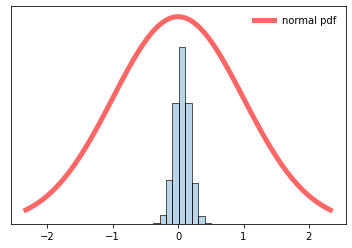

In [2]:
bootstrap(a_dist=norm(), n=100)

## Using the CLT

Let us compare the above plot to the one generated by `clt()` script.

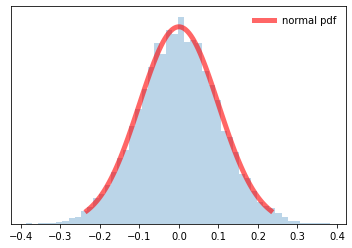

In [3]:
clt(a_dist=norm(), n=100, N=10000, bins=50)

## Notes

I don't know enough about Bootstrapping to comment, but I will say it is a rather peculiar plot, and does not look much like the distribution generated from the CLT.

However, it is **very** good estimate of the mean, with a single mode at the mean of the distribution and low variance.
I think I can see why it is popular, as this was done with just a single sample.